# 발라드 파형 분석

In [7]:
import librosa
import librosa.display, os

import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt

In [29]:
audio_path = './sounds/ballade/balad50.wav' # 도망가자....
ipd.Audio(audio_path)

start ===================
y -> 481328
480000


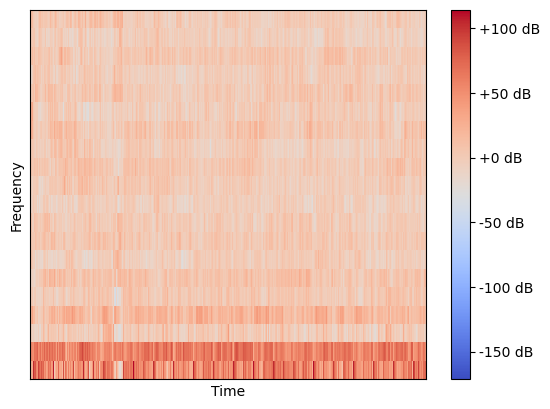

In [28]:
#폴더 경로 지정하기 -> dance
path='./sounds/dance'
#해당 폴더 안에 있는 파일 리스트 불러오기
file_names = os.listdir(path) # 'dance1.wav'...

# 일단 시험삼아 5개만 해보자 
for file_name in file_names[:1]:
    print("start ===================")
    save_path = './spectrograms/dance/'+file_name.split(".")[0]

    # print(path+file_name)
    # sr = 1초당 몇개의 데이터를 샘플링을 할지 
    y, sr = librosa.load(path+"/"+file_name, sr=16000)
    
    print("y ->", len(y))
    print(16000*30)
    n_fft = 2048 # window의 크기
    hop_length = 512  # window간 겹치는 부분 일반적으로 n_fft / 4

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, n_fft=n_fft, hop_length=hop_length) # sr 주의!!! 
    # stft 포함된 듯

    ##### plt.figure(figsize = (10,5))
    min_value, max_value = -600, 600
    librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length,)
    plt.savefig(save_path, pad_inches = 0, bbox_inches = 'tight')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [13]:
# #폴더 경로 지정하기 -> ballade
# path='./sounds/ballade'
# #해당 폴더 안에 있는 파일 리스트 불러오기
# file_names = os.listdir(path) # 'dance1.wav'...
# 
# # 일단 시험삼아 5개만 해보자 
# for file_name in file_names[:]:
#     print("start ===================")
#     save_path = './spectrograms/ballade/'+file_name.split(".")[0]
#     
#     # print(path+file_name)
#     # sr = 1초당 몇개의 데이터를 샘플링을 할지 
#     y, sr = librosa.load(path+"/"+file_name, sr=16000)
#     
#     print('sr:', sr, ', audio shape:', y.shape)
#     print('length:', y.shape[0]/float(sr), 'secs')
#     
#     
#     ###### STFT (Short-Time Fourier Transform)
#     n_fft = 2048 # window의 크기
#     hop_length = 512  # window간 겹치는 부분 일반적으로 n_fft / 4
#     
#     stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
#     spectrogram = np.abs(stft)
#     # print("Spectogram :\n", spectrogram)
#     
#     ######
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, n_fft=n_fft, hop_length=hop_length) # sr 주의!!! 
# 
#     # print("MFCC Shape: ", mfcc.shape)
#     # print("MFCC: \n", mfcc)
#     
#     ##### plt.figure(figsize = (10,5))
#     min_value, max_value = -600, 600
#     librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, vmin=min_value, vmax=max_value) # fmin=-500, fmax=8000
#     plt.savefig(save_path, pad_inches = 0, bbox_inches = 'tight')
#     # plt.xlabel("Time")
#     # plt.ylabel("Frequency")
#     plt.colorbar(format='%+2.0f dB')
#     plt.show()

In [14]:
# sr = 1초당 몇개의 데이터를 샘플링을 할지 
y, sr = librosa.load(audio_path, sr=16000)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 16000 , audio shape: (596867,)
length: 37.3041875 secs


Text(0.5, 1.0, 'Waveform')

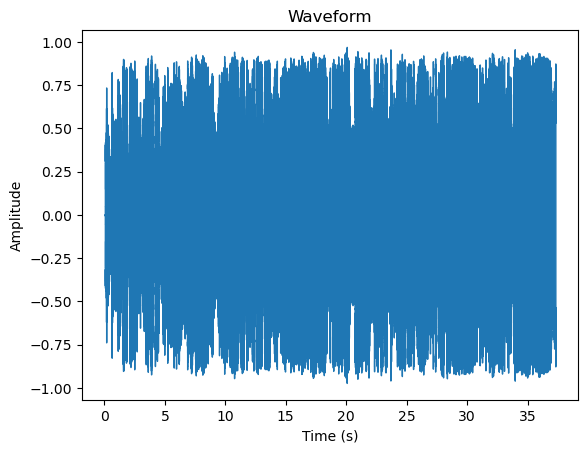

In [15]:
# 시간-진폭 그래프 그리기
plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
# plt.savefig(image_file)
# plt.close()

# 2. FFT (Fast Fourier Transform)
- time-donmain의 그래프를 frequency-domain으로 변환

Text(0.5, 1.0, 'Power spectrum')

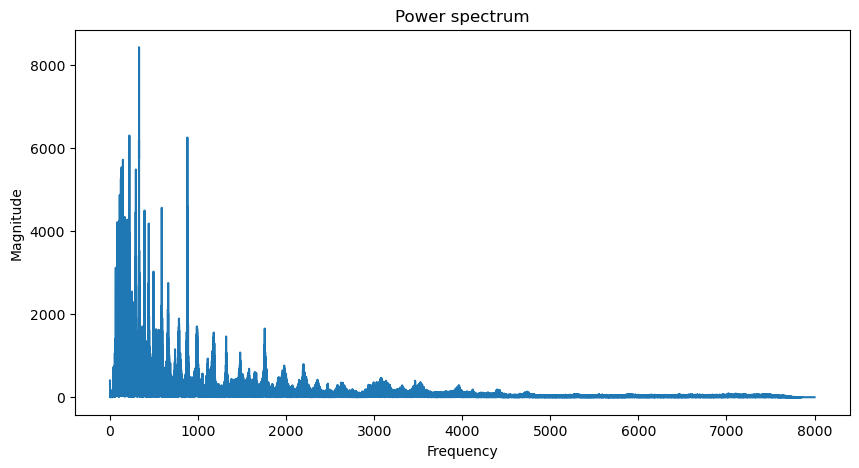

In [16]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

# 3. STFT (Short-Time Fourier Transform)
- STFT(Short-Time Fourier Transform)은 시간 정보가 유실되는 것을 방지하기 위해, 사전에 정의한 시간의 간격(window 또는 frame) 단위로 쪼개어 푸리에 변환을 적용하는 기법이다. STFT는 librosa를 통해 적용할 수 있다. 

In [17]:
# STFT (Short-Time Fourier Transform)
n_fft = 2048 # window의 크기
hop_length = 512  # window간 겹치는 부분 일반적으로 n_fft / 4

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[3.4115016e-01 6.5479004e-01 7.4988590e-03 ... 1.3778384e+00
  1.0433162e+00 3.0374253e-01]
 [3.2836348e-01 8.8358825e-01 7.4557835e-01 ... 1.1168028e+00
  3.2973164e-01 8.2262641e-01]
 [3.1130081e-01 1.0248801e+00 9.3703252e-01 ... 7.6419681e-01
  7.2940046e-01 1.0153435e+00]
 ...
 [3.3719018e-06 8.3642175e-07 1.9081742e-06 ... 1.5661684e-05
  3.0586433e-03 5.6462307e-02]
 [3.5093133e-06 1.6631249e-06 3.0286315e-06 ... 8.5304764e-06
  3.0559239e-03 5.6444474e-02]
 [3.4855495e-06 1.8177195e-06 1.9651877e-06 ... 1.5600461e-05
  3.0573062e-03 5.6435704e-02]]


# 스펙트럼 mgnitude 그리기 
- 주파수의 magnitude(진폭)를 그래프로 그리는 것

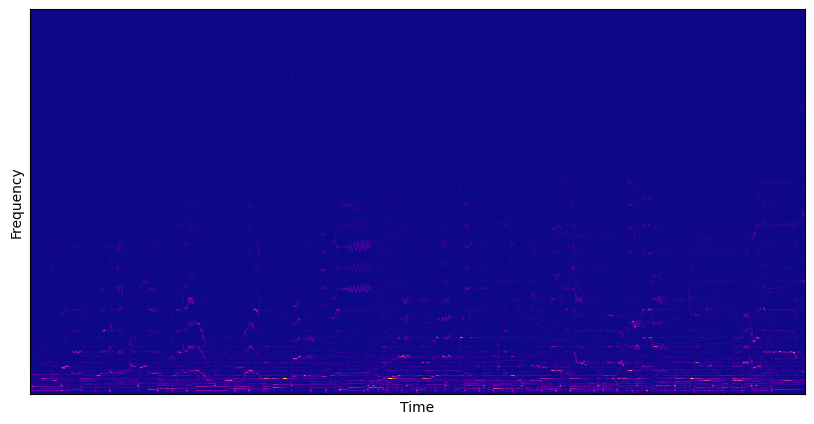

In [18]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

# Log-spectogram
- 푸리에변환 이후 dB(데시벨) scaling을 적용한 Log-spectogram을 구한다. 다분히 시각적인 이유뿐만 아니라, 사람의 청각 또한 소리를 dB scale 로 인식하기 때문에, 이를 반영하여 spectogram을 나타내는 것이 분석에 용이하다.

Text(0.5, 1.0, 'Spectrogram (dB)')

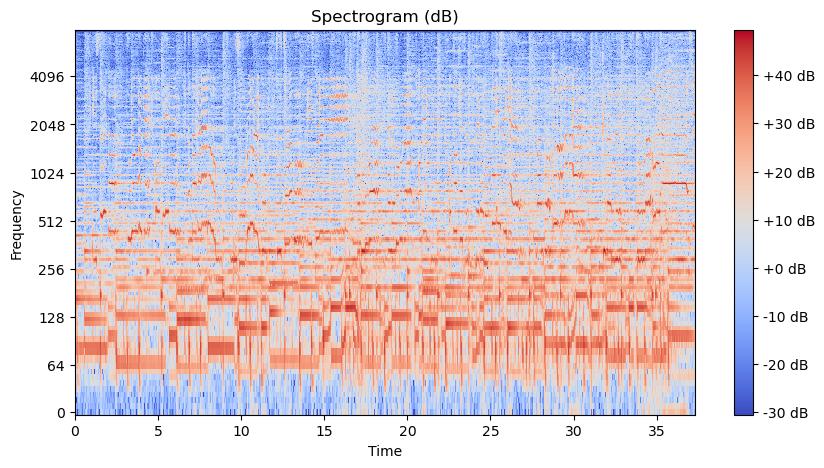

In [19]:
DB = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

# MFCC (Mel Frequency Cepstral Coefficient -> 피쳐 추출
- MFCC : 소리 데이터의 특징값(Feature)을 사람의 청각이 예민하게 반응하는 정볼르 강조하는 소리가 가지는 고유한 특징을 추출
- librosa.feature.mfcc(audio, sr, n_mfcc, n_fft, hop_length)
    - audio
    - sr : 22050Hz -> 앞에서 사용한 sr값을 사용해야함
    - n_mfcc : return될 mfcc의 개수를 정해주는 파라미터 default 20 
    - n_fft : win_length보다 길 경우 모두 zero padding해서 처리하기 위한 파라미터 default는 win_length와 같다
    - hop_length : 10ms 기본 16000Hz = 16000*0.01 = 160 즉, hop_length = sr * 0.01

In [20]:
sr # 처음에 선언한 값이 떠야함 

16000

In [21]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, n_fft=n_fft, hop_length=hop_length) # sr 주의!!! 

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (20, 1166)
MFCC: 
 [[-2.85079987e+02 -1.35008820e+02 -9.84852905e+01 ...  1.43665448e-01
  -4.92980957e+00  3.16590190e+00]
 [ 1.17788574e+02  1.14016724e+02  1.06013824e+02 ...  6.68952484e+01
   6.66535339e+01  6.49249268e+01]
 [ 3.47953415e+01  2.63083324e+01  2.61316891e+01 ... -3.50632834e+00
  -9.77527905e+00 -1.38996077e+01]
 ...
 [ 5.56441402e+00  6.33329105e+00  6.33217812e+00 ... -1.32747078e+01
  -6.72221994e+00 -2.27084446e+00]
 [-1.26394882e+01 -1.10414572e+01 -1.08045588e+01 ... -1.06145859e+01
  -1.10543976e+01 -1.33852386e+01]
 [-9.47539139e+00 -8.04287910e+00 -9.99763680e+00 ...  6.19426441e+00
   6.41246176e+00  9.25489426e+00]]


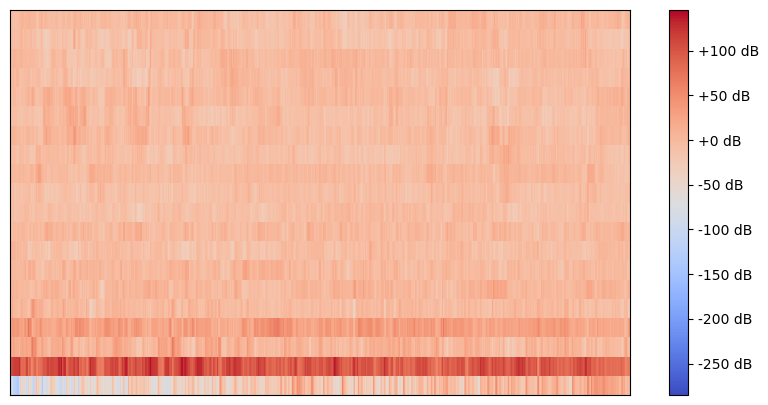

In [22]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length)
plt.savefig("sound_analysis", pad_inches = 0, bbox_inches = 'tight')
# plt.xlabel("Time")
# plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

In [23]:
len(y)

596867